<a href="https://colab.research.google.com/github/Msiwar/Envelope_Code/blob/master/FirstTestColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Télécharger le fichier des classes (coco.names)
!wget https://github.com/pjreddie/darknet/blob/master/data/coco.names?raw=true -O coco.names

--2024-11-01 10:45:26--  https://github.com/pjreddie/darknet/blob/master/data/coco.names?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/pjreddie/darknet/raw/refs/heads/master/data/coco.names [following]
--2024-11-01 10:45:26--  https://github.com/pjreddie/darknet/raw/refs/heads/master/data/coco.names
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pjreddie/darknet/refs/heads/master/data/coco.names [following]
--2024-11-01 10:45:26--  https://raw.githubusercontent.com/pjreddie/darknet/refs/heads/master/data/coco.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected

In [ ]:
            """ CODE PROJET IOT CAR-DETECTION """

In [3]:
# Télécharger les poids YOLO pré-entraînés
!wget https://pjreddie.com/media/files/yolov3.weights

--2024-11-01 10:44:22--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  17.2MB/s    in 15s     

2024-11-01 10:44:38 (15.4 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [11]:
import cv2  # Import OpenCV for image processing
import os   # Import OS for handling directories

# Step 1: Download YOLO model files if not already downloaded
!wget -q --show-progress https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg -O yolov3.cfg
!wget -q --show-progress https://pjreddie.com/media/files/yolov3.weights
!wget -q --show-progress https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names -O coco.names



yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      
yolov3.weights.5    100%[===================>] 236.52M  21.4MB/s    in 14s     
coco.names          100%[===================>]     625  --.-KB/s    in 0s      
Processed frames saved in: C:\Users\21650\Videos\Captures\extracted_images


In [12]:
from google.colab import files

uploaded = files.upload()  # This will open a file dialog for you to upload a file


Saving carAI.mp4 to carAI.mp4


In [17]:
import os

# Créer un dossier pour enregistrer les images
output_folder = 'extracted_images'
os.makedirs(output_folder, exist_ok=True)


In [18]:
import cv2
import os

# Récupérer le nom de la vidéo téléchargée
video_filename = next(iter(uploaded))  # Prend le premier fichier téléchargé

# Ouvrir la vidéo
video = cv2.VideoCapture(video_filename)

# Vérifier si la vidéo a été ouverte correctement
if not video.isOpened():
    print("Erreur : Impossible d'ouvrir la vidéo.")
else:
    print("Vidéo ouverte avec succès !")

# Compteur pour les images
frame_count = 0
total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))  # Nombre total d'images dans la vidéo
print(f"Total des images dans la vidéo : {total_frames}")

# Intervalle pour extraire 20 images
images_to_extract = 20
interval = total_frames // images_to_extract if total_frames >= images_to_extract else 1

print(f"Intervalle pour extraire les images : {interval} images.")

# Compteur pour le nombre d'images enregistrées
saved_count = 0

while video.isOpened() and saved_count < images_to_extract:
    ret, frame = video.read()  # Lire un cadre de la vidéo
    if not ret:
        print("Fin de la vidéo ou impossible de lire la vidéo.")
        break

    # Enregistrer l'image si c'est l'intervalle approprié
    if frame_count % interval == 0:
        frame_filename = os.path.join(output_folder, f'frame_{saved_count:04d}.jpg')
        cv2.imwrite(frame_filename, frame)  # Enregistrer l'image
        saved_count += 1

    frame_count += 1  # Incrémenter le compteur des images

# Libérer l'objet de capture vidéo
video.release()
print(f"{saved_count} images extraites et enregistrées dans le dossier '{output_folder}'.")



Vidéo ouverte avec succès !
Total des images dans la vidéo : 1192
Intervalle pour extraire les images : 59 images.
20 images extraites et enregistrées dans le dossier 'extracted_images'.


In [22]:
import cv2
import os

# Définir les chemins des dossiers
input_folder = 'extracted_images'  # Dossier contenant les images extraites
output_folder = 'grayscale_images'    # Dossier pour enregistrer les images en niveaux de gris

# Créer le dossier pour les images en niveaux de gris s'il n'existe pas
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Lister tous les fichiers dans le dossier d'entrée
for filename in os.listdir(input_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Vérifier les types de fichiers
        # Charger l'image
        img_path = os.path.join(input_folder, filename)
        image = cv2.imread(img_path)

        # Convertir l'image en niveaux de gris
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Enregistrer l'image en niveaux de gris dans le dossier de sortie
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, gray_image)

        print(f"Image convertie en niveaux de gris et enregistrée : {output_path}")

print("Toutes les images ont été traitées.")



Image convertie en niveaux de gris et enregistrée : grayscale_images/frame_0015.jpg
Image convertie en niveaux de gris et enregistrée : grayscale_images/frame_0000.jpg
Image convertie en niveaux de gris et enregistrée : grayscale_images/frame_0017.jpg
Image convertie en niveaux de gris et enregistrée : grayscale_images/frame_0004.jpg
Image convertie en niveaux de gris et enregistrée : grayscale_images/frame_0016.jpg
Image convertie en niveaux de gris et enregistrée : grayscale_images/frame_0006.jpg
Image convertie en niveaux de gris et enregistrée : grayscale_images/frame_0018.jpg
Image convertie en niveaux de gris et enregistrée : grayscale_images/frame_0014.jpg
Image convertie en niveaux de gris et enregistrée : grayscale_images/frame_0003.jpg
Image convertie en niveaux de gris et enregistrée : grayscale_images/frame_0012.jpg
Image convertie en niveaux de gris et enregistrée : grayscale_images/frame_0001.jpg
Image convertie en niveaux de gris et enregistrée : grayscale_images/frame_0

In [24]:
import cv2
import os
import numpy as np  # Importer NumPy

# Chemin des fichiers YOLO
yolo_cfg = 'yolov3.cfg'  # Assurez-vous que le fichier yolov3.cfg est dans votre répertoire
yolo_weights = 'yolov3.weights'  # Assurez-vous que le fichier yolov3.weights est dans votre répertoire
coco_names = 'coco.names'  # Assurez-vous que le fichier coco.names est dans votre répertoire

# Charger le modèle YOLO
net = cv2.dnn.readNet(yolo_weights, yolo_cfg)
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Dossier des images en niveaux de gris
input_folder = 'grayscale_images'  # Dossier contenant les images en niveaux de gris
output_folder = 'detected_cars'    # Dossier pour enregistrer les images avec voitures détectées

# Créer le dossier de sortie s'il n'existe pas
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Lister tous les fichiers dans le dossier d'entrée
for filename in os.listdir(input_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Vérifier les types de fichiers
        # Charger l'image
        img_path = os.path.join(input_folder, filename)
        image = cv2.imread(img_path)
        height, width, _ = image.shape

        # Préparer l'image pour la détection
        blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
        net.setInput(blob)
        outputs = net.forward(output_layers)

        # Liste pour stocker les informations de détection
        class_ids = []
        confidences = []
        boxes = []

        # Parcourir chaque détection
        for output in outputs:
            for detection in output:
                scores = detection[5:]  # Les scores pour chaque classe
                class_id = np.argmax(scores)  # Obtenir l'ID de la classe avec la plus haute confiance
                confidence = scores[class_id]  # Obtenir la confiance associée
                if confidence > 0.5 and class_id == 2:  # 2 est l'ID de la classe pour 'car'
                    # Coordonées de la boîte englobante
                    center_x = int(detection[0] * width)
                    center_y = int(detection[1] * height)
                    w = int(detection[2] * width)
                    h = int(detection[3] * height)

                    # Calculer le coin supérieur gauche de la boîte englobante
                    x = int(center_x - w / 2)
                    y = int(center_y - h / 2)

                    boxes.append([x, y, w, h])  # Ajouter les coordonnées de la boîte
                    confidences.append(float(confidence))  # Ajouter la confiance
                    class_ids.append(class_id)  # Ajouter l'ID de la classe

        # Suppression des doublons avec Non-Maximum Suppression
        indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

        # Dessiner des rectangles autour des voitures détectées
        for i in range(len(boxes)):
            if i in indexes:
                x, y, w, h = boxes[i]
                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Dessiner le rectangle en rouge

        # Enregistrer l'image avec les voitures détectées
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, image)
        print(f"Image avec voitures détectées enregistrée : {output_path}")

print("Détection de voitures terminée.")


Image avec voitures détectées enregistrée : detected_cars/frame_0015.jpg
Image avec voitures détectées enregistrée : detected_cars/frame_0000.jpg
Image avec voitures détectées enregistrée : detected_cars/frame_0017.jpg
Image avec voitures détectées enregistrée : detected_cars/frame_0004.jpg
Image avec voitures détectées enregistrée : detected_cars/frame_0016.jpg
Image avec voitures détectées enregistrée : detected_cars/frame_0006.jpg
Image avec voitures détectées enregistrée : detected_cars/frame_0018.jpg
Image avec voitures détectées enregistrée : detected_cars/frame_0014.jpg
Image avec voitures détectées enregistrée : detected_cars/frame_0003.jpg
Image avec voitures détectées enregistrée : detected_cars/frame_0012.jpg
Image avec voitures détectées enregistrée : detected_cars/frame_0001.jpg
Image avec voitures détectées enregistrée : detected_cars/frame_0005.jpg
Image avec voitures détectées enregistrée : detected_cars/frame_0008.jpg
Image avec voitures détectées enregistrée : detecte

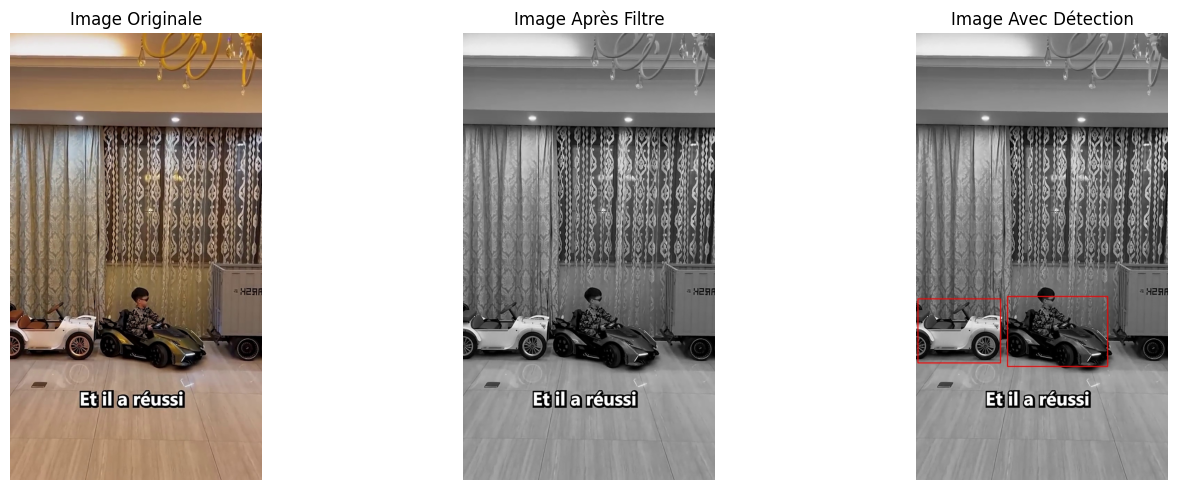

In [27]:
import cv2
import matplotlib.pyplot as plt

# Chemins des images
original_image_path = 'extracted_images/frame_0015.jpg'  # Chemin de l'image originale
filtered_image_path = 'grayscale_images/frame_0015.jpg'  # Chemin de l'image après filtre
detected_image_path = 'detected_cars/frame_0015.jpg'  # Chemin de l'image avec détection

# Charger les images
original_image = cv2.imread(original_image_path)
filtered_image = cv2.imread(filtered_image_path)
detected_image = cv2.imread(detected_image_path)

# Vérifier si les images ont été chargées correctement
if original_image is None:
    print(f"Erreur : Impossible de charger l'image originale à partir de {original_image_path}")
if filtered_image is None:
    print(f"Erreur : Impossible de charger l'image filtrée à partir de {filtered_image_path}")
if detected_image is None:
    print(f"Erreur : Impossible de charger l'image détectée à partir de {detected_image_path}")

# Convertir BGR à RGB pour Matplotlib (seulement si les images ont été chargées)
if original_image is not None:
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
if filtered_image is not None:
    filtered_image = cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB)
if detected_image is not None:
    detected_image = cv2.cvtColor(detected_image, cv2.COLOR_BGR2RGB)

# Créer une figure pour afficher les images
plt.figure(figsize=(15, 5))

# Afficher l'image originale
if original_image is not None:
    plt.subplot(1, 3, 1)
    plt.imshow(original_image)
    plt.title('Image Originale')
    plt.axis('off')  # Désactiver les axes

# Afficher l'image après filtre
if filtered_image is not None:
    plt.subplot(1, 3, 2)
    plt.imshow(filtered_image)
    plt.title('Image Après Filtre')
    plt.axis('off')  # Désactiver les axes

# Afficher l'image avec détection
if detected_image is not None:
    plt.subplot(1, 3, 3)
    plt.imshow(detected_image)
    plt.title('Image Avec Détection')
    plt.axis('off')  # Désactiver les axes

# Afficher toutes les images
plt.tight_layout()
plt.show()
